# Neural_Network_Assignment_(Gas_Turbines)

In [8]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [2]:
#Importing dataset
df=pd.read_csv('C:/Users/Akash Kundu/Desktop/ExcelR/Assingments/gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
df[df.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


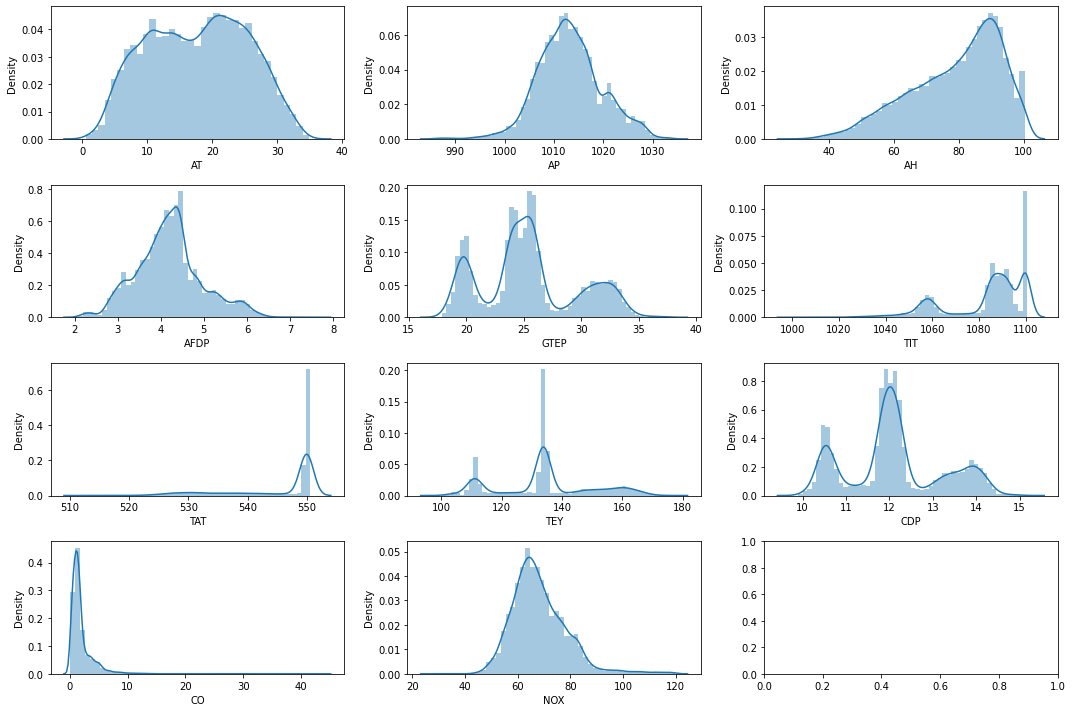

In [6]:
#Visualization using distplot
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.distplot(df.AT, ax=ax[0,0])
sns.distplot(df.AP, ax=ax[0,1])
sns.distplot(df.AH, ax=ax[0,2])
sns.distplot(df.AFDP, ax=ax[1,0])
sns.distplot(df.GTEP, ax=ax[1,1])
sns.distplot(df.TIT, ax=ax[1,2])
sns.distplot(df.TAT, ax=ax[2,0])
sns.distplot(df.TEY, ax=ax[2,1])
sns.distplot(df.CDP, ax=ax[2,2])
sns.distplot(df.CO, ax=ax[3,0])
sns.distplot(df.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

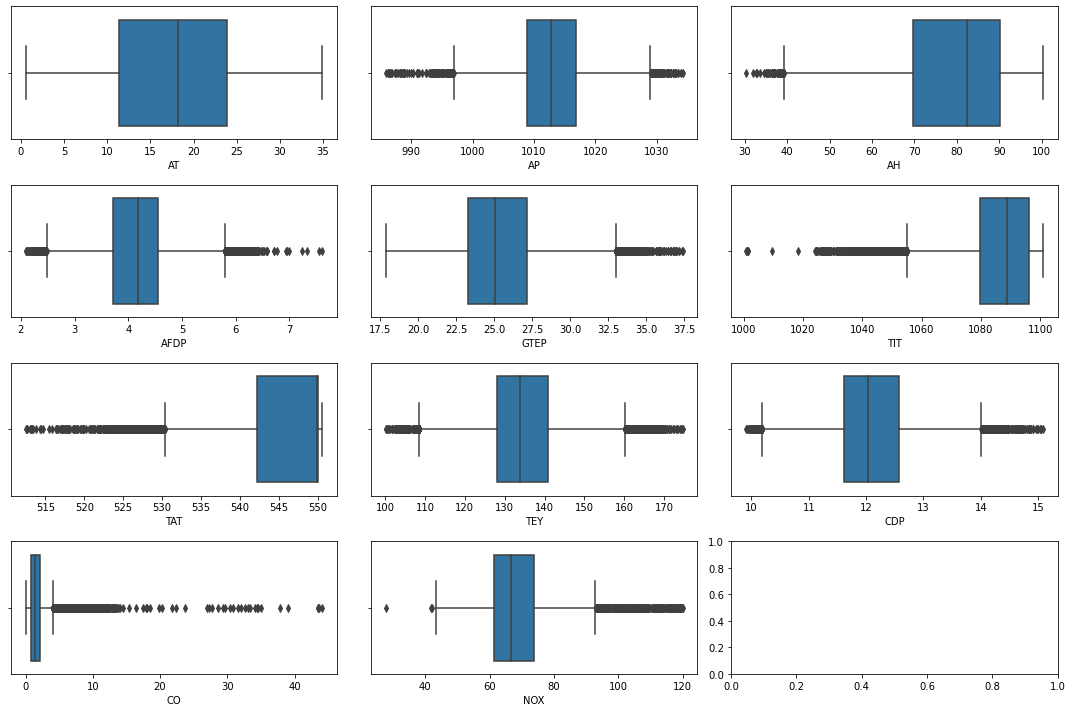

In [7]:
# Checking of outliers

fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(df.AT, ax=ax[0,0])
sns.boxplot(df.AP, ax=ax[0,1])
sns.boxplot(df.AH, ax=ax[0,2])
sns.boxplot(df.AFDP, ax=ax[1,0])
sns.boxplot(df.GTEP, ax=ax[1,1])
sns.boxplot(df.TIT, ax=ax[1,2])
sns.boxplot(df.TAT, ax=ax[2,0])
sns.boxplot(df.TEY, ax=ax[2,1])
sns.boxplot(df.CDP, ax=ax[2,2])
sns.boxplot(df.CO, ax=ax[3,0])
sns.boxplot(df.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

In [10]:
# Normalize the data 
df1 = pd.DataFrame(MinMaxScaler().fit_transform(df),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
df1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


### Extracting Independent and Dependent variables

In [12]:
X=df1.drop(axis=0, columns='TEY').values
Y=df1['TEY'].values

In [13]:
X

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [14]:
Y

array([0.19519076, 0.19545943, 0.19532509, ..., 0.13460505, 0.14199355,
       0.15327781])

In [15]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

### Building Model

In [16]:
model= Sequential()
model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))

In [17]:
#compile Model
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

### Model testing

In [18]:
model.fit(X,Y,validation_split=0.33,epochs=100,batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 3s 2ms/step - loss: 0.0223 - accuracy: 9.9246e-05 - val_loss: 3.7019e-04 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.5406e-04 - accuracy: 9.9246e-05 - val_loss: 1.9140e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.6174e-04 - accuracy: 9.9246e-05 - val_loss: 1.4696e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.4069e-04 - accuracy: 9.9246e-05 - val_loss: 1.2313e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.3363e-04 - accuracy: 9.9246e-05 - val_loss: 1.3108e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.2808e-04 - accuracy: 9.9246e-05 - val_loss: 1.1625e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===============

1008/1008 [==============================] - 2s 2ms/step - loss: 1.1752e-04 - accuracy: 9.9246e-05 - val_loss: 1.1565e-04 - val_accuracy: 2.0149e-04
Epoch 52/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1706e-04 - accuracy: 9.9246e-05 - val_loss: 1.5896e-04 - val_accuracy: 2.0149e-04
Epoch 53/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1579e-04 - accuracy: 9.9246e-05 - val_loss: 1.0766e-04 - val_accuracy: 2.0149e-04
Epoch 54/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1483e-04 - accuracy: 9.9246e-05 - val_loss: 1.0263e-04 - val_accuracy: 2.0149e-04
Epoch 55/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1613e-04 - accuracy: 9.9246e-05 - val_loss: 1.3592e-04 - val_accuracy: 2.0149e-04
Epoch 56/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1667e-04 - accuracy: 9.9246e-05 - val_loss: 1.1790e-04 - val_accuracy: 2.0149e-04
Epoch 57/100
1008/1008 [=================

In [19]:
# evaluate the model
scores=model.evaluate(X,Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]* scores[1]*100))

470/470 [==============================] - 1s 2ms/step - loss: 1.0428e-04 - accuracy: 1.3299e-04
accuracy: 0.00%


In [20]:
history = model.fit(X,Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1278e-04 - accuracy: 9.9246e-05 - val_loss: 1.4273e-04 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1077e-04 - accuracy: 9.9246e-05 - val_loss: 1.1220e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1327e-04 - accuracy: 9.9246e-05 - val_loss: 1.6852e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.0756e-04 - accuracy: 9.9246e-05 - val_loss: 1.0448e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.1026e-04 - accuracy: 9.9246e-05 - val_loss: 9.8946e-05 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.0828e-04 - accuracy: 9.9246e-05 - val_loss: 1.0292e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===========

1008/1008 [==============================] - 2s 2ms/step - loss: 9.7028e-05 - accuracy: 9.9246e-05 - val_loss: 1.0555e-04 - val_accuracy: 2.0149e-04
Epoch 52/100
1008/1008 [==============================] - 2s 2ms/step - loss: 9.7161e-05 - accuracy: 9.9246e-05 - val_loss: 1.0154e-04 - val_accuracy: 2.0149e-04
Epoch 53/100
1008/1008 [==============================] - 2s 2ms/step - loss: 9.5898e-05 - accuracy: 9.9246e-05 - val_loss: 1.1730e-04 - val_accuracy: 2.0149e-04
Epoch 54/100
1008/1008 [==============================] - 2s 2ms/step - loss: 9.6227e-05 - accuracy: 9.9246e-05 - val_loss: 9.6893e-05 - val_accuracy: 2.0149e-04
Epoch 55/100
1008/1008 [==============================] - 2s 2ms/step - loss: 9.6677e-05 - accuracy: 9.9246e-05 - val_loss: 1.0551e-04 - val_accuracy: 2.0149e-04
Epoch 56/100
1008/1008 [==============================] - 2s 2ms/step - loss: 9.1740e-05 - accuracy: 9.9246e-05 - val_loss: 9.6672e-05 - val_accuracy: 2.0149e-04
Epoch 57/100
1008/1008 [=================

In [22]:
# list all data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

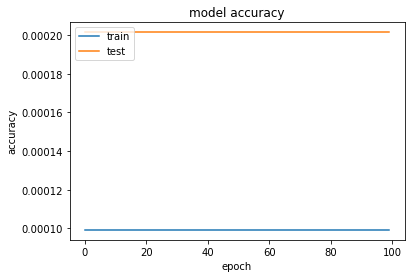

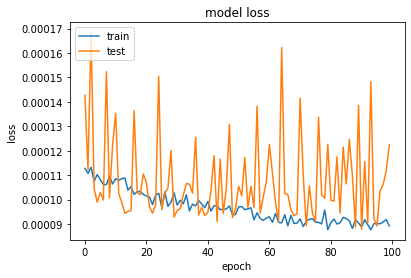

In [23]:
# Visualize training history


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

### Tuning of Hyperparameter:- Batch Size and Epochs

In [24]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier

In [25]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))
    
    adam = tf.keras.optimizers.Adam(lr = 0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    return model

In [26]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=  14.3s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=  13.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=  13.5s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=  13.8s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=  13.9s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10